In [1]:
%cd ..
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from melp import Detector
import melp
import math
import random
from glob import glob

from melp.clustering.misc import*
import melp.clustering as clump
import melp.clustering.time_cluster as tclump
#from melp import TileAnalyzer
import melp.clustering.spatial_cluster as sclump
import melp.clustering.plots as clump_plt
import melp.clustering.three_frame_cluster as clump_3

plt.rcParams.update({'font.size': 16})

/home/erik/GitHub/melp
Welcome to JupyROOT 6.24/06


In [2]:
time_threshold_used = 1.2

function_str = "mt_compare_to_primary"
src = "./testdata/sorted/root_files_fixed/mu3e_sorted_000*.root"

args = (time_threshold_used, "big", None, "timetheniterativespatial")

clump.multithreading.run_mt(function_str, src, args)

-----------------------
Available threads =  8
Used threads =  5
-----------------------
read file read file read file read file read file      24135


started thread 

started thread  started thread started thread 2  4
started thread 5

  31

read file  6
started thread  6
read file  7
started thread  7
read file  8
started thread  8
read file  9
started thread  9


In [3]:
src2 = "./melp/clustering/results"

src_frac_corr_frame          = src2 + "/frac_corr_frame_*.txt"
src_frac_corr_clusters_frame = src2 + "/frac_corr_clusters_frame_*.txt"
src_frac_uncorr_frame        = src2 + "/frac_uncorr_frame_*.txt"
src_efficiency_stats         = src2 + "/efficiency_stats_*.txt"

fnames_frac_corr_frame           = glob(src_frac_corr_frame)
fnames_frac_corr_clusters_frame  = glob(src_frac_corr_clusters_frame)
fnames_frac_uncorr_frame         = glob(src_frac_uncorr_frame)
fnames_efficiency_stats          = glob(src_efficiency_stats)

array_frac_corr_frame          = np.concatenate([np.loadtxt(f) for f in fnames_frac_corr_frame])
array_frac_corr_clusters_frame = np.concatenate([np.loadtxt(f) for f in fnames_frac_corr_clusters_frame])
array_frac_uncorr_frame        = np.concatenate([np.loadtxt(f) for f in fnames_frac_uncorr_frame])
#array_efficiency_stats         = np.concatenate([np.loadtxt(f) for f in fnames_efficiency_stats])

## Efficiency statistics

In [4]:
for f in fnames_efficiency_stats:
    print("File: " + f)
    with open(f, "r", encoding="utf-8") as file:
        for line in file:
            print(line.strip())
    print("\n")

File: ./melp/clustering/results/efficiency_stats_132.txt
Number of analyzed frames:  1000 Number of correct counter fractions:  1000
Total #hits in frames/#hits in clusters =  1.0
Correctly associated out of all hits:  73.76524242326228 %
Correctly associated out of all hits in clusters:  73.76524242326228 %
Incorrectly associated out of all hits:  26.234757576737717 %
Incorrectly associated out of all hits in clusters:  26.234757576737717 %


File: ./melp/clustering/results/efficiency_stats_128.txt
Number of analyzed frames:  1000 Number of correct counter fractions:  999
Total #hits in frames/#hits in clusters =  1.0
Correctly associated out of all hits:  74.42205384491376 %
Correctly associated out of all hits in clusters:  74.42205384491376 %
Incorrectly associated out of all hits:  25.577946155086252 %
Incorrectly associated out of all hits in clusters:  25.577946155086252 %


File: ./melp/clustering/results/efficiency_stats_130.txt
Number of analyzed frames:  1000 Number of corre

## Efficiency plots

### Hits associated to wrong cluster

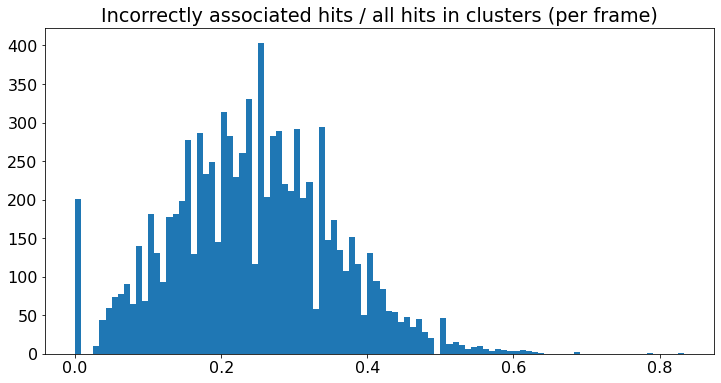

In [5]:
fig = plt.figure(figsize=(12,6))
plt.hist(array_frac_uncorr_frame, bins = 100)
plt.title("Incorrectly associated hits / all hits in clusters (per frame)")
plt.show()

### Hits associated to correct cluster

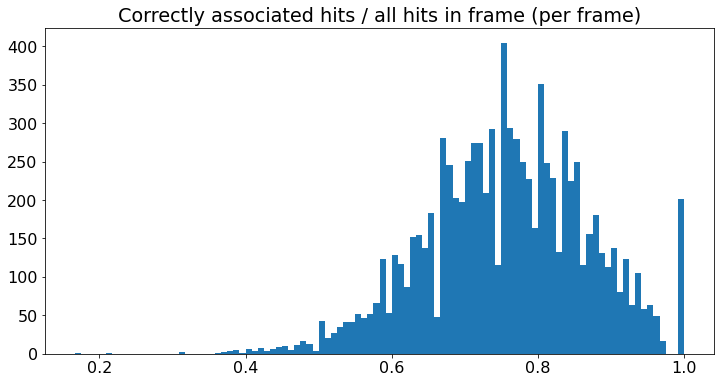

In [6]:
fig = plt.figure(figsize=(12,6))
plt.hist(array_frac_corr_frame, bins = 100)
plt.title("Correctly associated hits / all hits in frame (per frame)")
plt.show()